In [1]:
%matplotlib inline
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.callbacks import Callback, ModelCheckpoint

Using TensorFlow backend.


In [2]:
IMG_WIDTH, IMG_HEIGHT = 150, 150
TRAIN_DATA_DIR = 'data/train'
VALIDATION_DATA_DIR = 'data/validation'
MODEL_WEIGHTS_FILE = 'first_try.h5'
NB_TRAIN_SAMPLES = 2000
NB_VALIDATION_SAMPLES = 800
NB_EPOCH = 50

In [3]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [4]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 148, 148, 32)  896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 74, 74, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 72, 72, 32)    9248        maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 36, 36, 32)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [6]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
        TRAIN_DATA_DIR,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=32,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [9]:
validation_generator = test_datagen.flow_from_directory(
        VALIDATION_DATA_DIR,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=32,
        class_mode='categorical')

Found 802 images belonging to 2 classes.


In [10]:
callbacks = [ModelCheckpoint(MODEL_WEIGHTS_FILE, monitor='val_acc', save_best_only=True)]
history = model.fit_generator(
        train_generator,
        callbacks = callbacks,
        samples_per_epoch=NB_TRAIN_SAMPLES,
        nb_epoch=NB_EPOCH,
        validation_data=validation_generator,
        nb_val_samples=NB_VALIDATION_SAMPLES)

Epoch 1/50
2000/2000 [==============================] - 19s - loss: 0.6954 - acc: 0.5320 - val_loss: 0.6852 - val_acc: 0.5687
Epoch 2/50
2000/2000 [==============================] - 16s - loss: 0.6835 - acc: 0.5600 - val_loss: 0.6568 - val_acc: 0.5935
Epoch 3/50
2000/2000 [==============================] - 16s - loss: 0.6672 - acc: 0.5860 - val_loss: 0.7197 - val_acc: 0.5411
Epoch 4/50
2000/2000 [==============================] - 16s - loss: 0.6483 - acc: 0.6000 - val_loss: 0.6664 - val_acc: 0.6010
Epoch 5/50
2000/2000 [==============================] - 17s - loss: 0.6400 - acc: 0.6300 - val_loss: 0.6586 - val_acc: 0.6284
Epoch 6/50
2000/2000 [==============================] - 16s - loss: 0.6316 - acc: 0.6340 - val_loss: 0.6309 - val_acc: 0.6359
Epoch 7/50
2000/2000 [==============================] - 16s - loss: 0.6249 - acc: 0.6335 - val_loss: 0.6015 - val_acc: 0.6820
Epoch 8/50
2000/2000 [==============================] - 16s - loss: 0.6135 - acc: 0.6625 - val_loss: 0.6046 - val_acc:

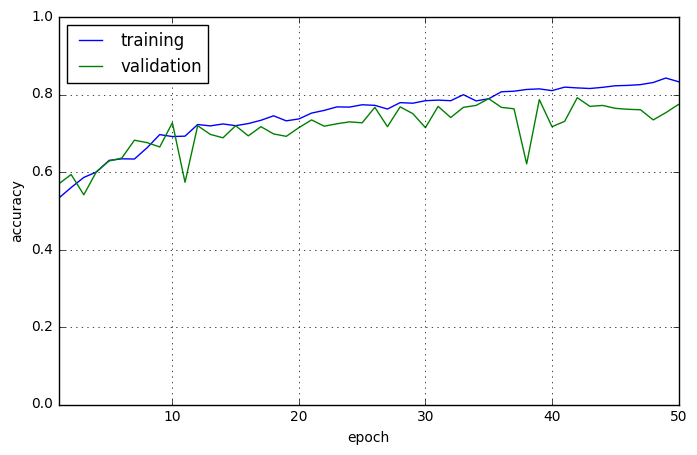

In [11]:
acc = pd.DataFrame({'epoch': [ i + 1 for i in history.epoch ],
                    'training': history.history['acc'],
                    'validation': history.history['val_acc']})
ax = acc.ix[:,:].plot(x='epoch', figsize={5,8}, grid=True)
ax.set_ylabel("accuracy")
ax.set_ylim([0.0,1.0]);